🐕  
# End to end  multi class Dog breed Classification

This notebook create a multi class image classifier using tensorflow2.o and tensorflow hub

## 1. Problem Statement
Identifying the breed of a dog with its image

## 2. Data
Data is available on Kaggle's dog breed competetion

https://www.kaggle.com/competitions/dog-breed-identification/data

## 3. Evaluation
The evaluation is file of predicting probablities of each dog breed of each test image

https://www.kaggle.com/competitions/dog-breed-identification/overview/evaluation

## 4. Features

Some Info about the data:

* we're dealing with the images (unstructured data) so it best we use deep learning/Transfer learning

* There are 120 different dog breeds (120 different classes)

* More than 10000 images with labels for traing

* More than 10000 images without labels for predicting


### Getting Workspace Ready
1. import Tensorflow 2.0
2. import Tensorflow hub
3. Make sure to use a GPU


In [1]:
# Import all tools
import tensorflow as tf
import tensorflow_hub as hub
print("TesnorFlow Version: ",tf.__version__)
print("TensorFlow Hub Version: ",hub.__version__)

# Check for GPU availability
print("GPU","Available (YESSS!!!)" if tf.config.list_physical_devices("GPU") else "not available, change runtime type")

TesnorFlow Version:  2.10.1
TensorFlow Hub Version:  0.12.0
GPU Available (YESSS!!!)


## Getiing our data ready

With all Machine Learning model, our data should be numerical. So we first need to convert our images into tensors( Numerical Representation)

In [2]:
## Checkout labels
import pandas as pd
label_csv = pd.read_csv("./labels.csv")
print(label_csv.describe())
print(label_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


In [3]:
label_csv.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

<AxesSubplot: >

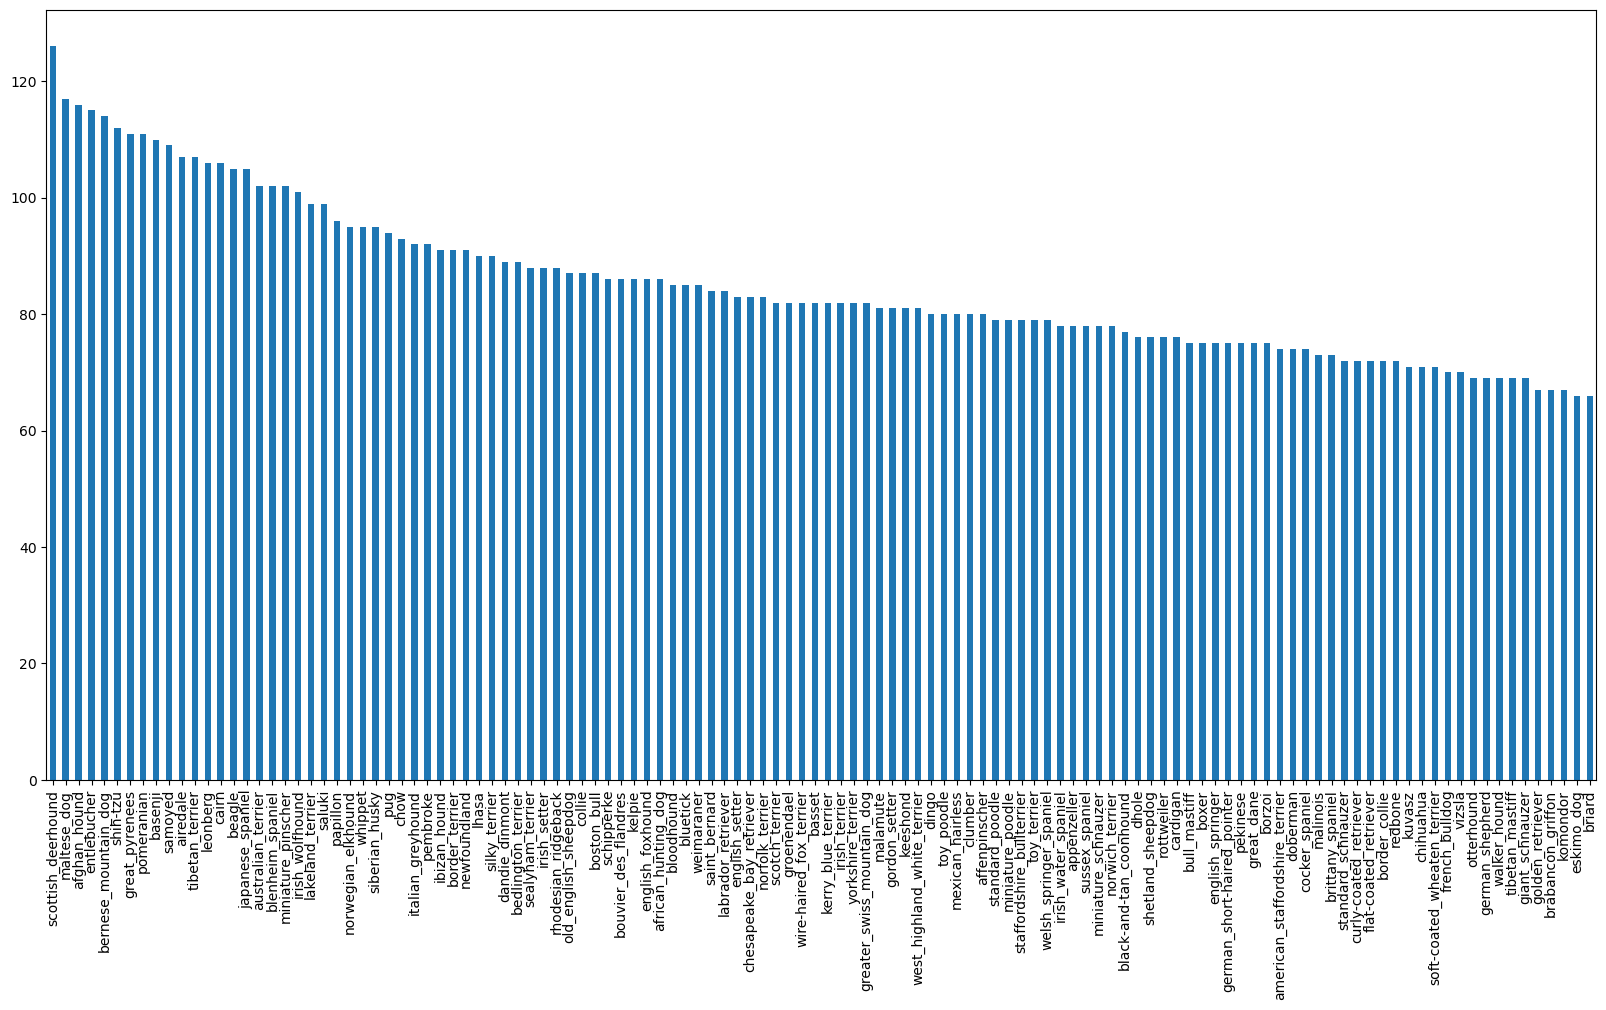

In [4]:
label_csv["breed"].value_counts().plot.bar(figsize=(20,10))

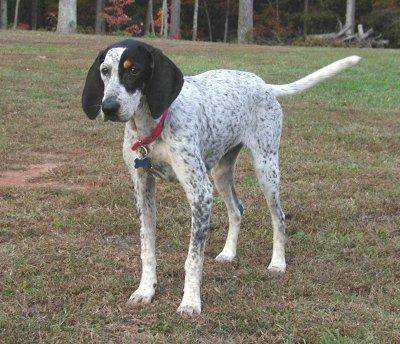

In [5]:
## Let's view an image
from IPython.display import Image
Image("./train/00214f311d5d2247d5dfe4fe24b2303d.jpg")

## Getting images and their labels

Let's get a list of all our image file pathnames


In [6]:
label_csv.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

In [7]:
# Create path from Image ID's
filenames = ["./train/"+fname+".jpg" for fname in label_csv.id]

filenames[:10]

['./train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 './train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 './train/001cdf01b096e06d78e9e5112d419397.jpg',
 './train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 './train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 './train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 './train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 './train/002a283a315af96eaea0e28e7163b21b.jpg',
 './train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 './train/0042188c895a2f14ef64a918ed9c7b64.jpg']

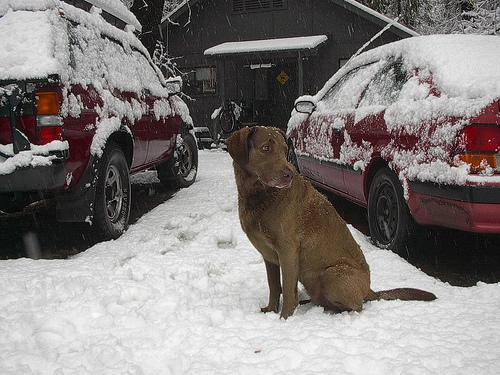

In [8]:
Image(filenames[10221])

In [9]:
 # Check whether number of filenames matches the number of actual images file

 import os

 val0 = os.listdir("./train/")
 val1 = [fname for fname in label_csv.id]

 print(len(val0),len(val1))


10222 10222


### Since we've now got our trainig image file paths, let's prepare our labels


In [10]:
import numpy as np
labels = label_csv.breed.to_numpy()
#labels = np.array(labels)
labels[:5]

array(['boston_bull', 'dingo', 'pekinese', 'bluetick', 'golden_retriever'],
      dtype=object)

In [11]:
 len(labels)

10222

In [12]:
# Check for missing data
if(len(labels)==len(filenames)):
  print("No missing data, ready for preprocessing")
else:
  print("Remove the missing data")

No missing data, ready for preprocessing


In [13]:
# Find the number of unique breeds
unique_breeds = np.unique(labels)
len(unique_breeds)
unique_breeds


array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [14]:
# Turn a single label to boolean array
print(labels[0])
labels[0]==unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [15]:
# Turn every label to boolean array
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:2]




[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [16]:
len(boolean_labels)

10222

In [17]:
# Turning boolean arrays into integers
print(labels[0])
print(np.where(labels[0]==unique_breeds))
print(boolean_labels[0].argmax())
print(boolean_labels[0].astype(int))

boston_bull
(array([19], dtype=int64),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [18]:
 print(labels[1])
 print(boolean_labels[1].astype(int))

dingo
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


### Creating our own validation set
Kaggle doesnt provide a validation set. so, we need to create our own validation set.

In [19]:
# Setup X and y
X = filenames
y = boolean_labels

### We first start with 1000 samples and increase as we needed

In [20]:
# Set the number of images used for experimenting
NUM_IMAGES = 1000 #@param {type:"slider" ,min:1000,max:10000,step:1000}

In [21]:
# Split the data into validation and test split
from sklearn.model_selection import train_test_split

X_train,X_val,y_train,y_val = train_test_split(X[:NUM_IMAGES],y[:NUM_IMAGES],test_size = 0.2,random_state = 42)

len(X_train),len(X_val),len(y_train),len(y_val)

(800, 200, 800, 200)

## Preprocessing Images ( Turning image into tensors)

To preprocess our images into tensors we write a function that performs a few things:

1. Take image filepath as input
2. Use tensorflow to read the file and save it to a variable `image`
3. Turn our `image` (a jpg) to tensor
4. Resize `image` to a shape (224,224)
5. Return the modified image

Refer to https://www.tensorflow.org/tutorials for help

Before we make a function let's see what importing an image looks like


In [22]:
# Convert image to numpy array
from matplotlib.pyplot import imread
image = imread(filenames[0])
image.shape

(375, 500, 3)

In [23]:
image

array([[[109,  46,   0],
        [153,  91,  40],
        [180, 120,  68],
        ...,
        [176, 144,  71],
        [189, 157,  84],
        [214, 182, 109]],

       [[153,  92,  47],
        [179, 121,  75],
        [167, 111,  64],
        ...,
        [167, 135,  58],
        [171, 139,  62],
        [188, 156,  79]],

       [[152,  97,  56],
        [189, 136,  94],
        [164, 113,  70],
        ...,
        [200, 168,  81],
        [194, 162,  75],
        [200, 168,  81]],

       ...,

       [[189, 122,  69],
        [186, 119,  66],
        [183, 116,  63],
        ...,
        [213, 160, 108],
        [212, 159, 107],
        [209, 156, 104]],

       [[186, 119,  66],
        [184, 117,  64],
        [183, 116,  63],
        ...,
        [197, 145,  88],
        [199, 147,  90],
        [199, 147,  90]],

       [[182, 115,  62],
        [181, 114,  61],
        [183, 116,  63],
        ...,
        [184, 132,  74],
        [190, 138,  80],
        [192, 140,  82]]

In [24]:
image.min(),image.max()

(0, 255)

In [25]:
  # Turn image into a Tensor
  tf.constant(image)

<tf.Tensor: shape=(375, 500, 3), dtype=uint8, numpy=
array([[[109,  46,   0],
        [153,  91,  40],
        [180, 120,  68],
        ...,
        [176, 144,  71],
        [189, 157,  84],
        [214, 182, 109]],

       [[153,  92,  47],
        [179, 121,  75],
        [167, 111,  64],
        ...,
        [167, 135,  58],
        [171, 139,  62],
        [188, 156,  79]],

       [[152,  97,  56],
        [189, 136,  94],
        [164, 113,  70],
        ...,
        [200, 168,  81],
        [194, 162,  75],
        [200, 168,  81]],

       ...,

       [[189, 122,  69],
        [186, 119,  66],
        [183, 116,  63],
        ...,
        [213, 160, 108],
        [212, 159, 107],
        [209, 156, 104]],

       [[186, 119,  66],
        [184, 117,  64],
        [183, 116,  63],
        ...,
        [197, 145,  88],
        [199, 147,  90],
        [199, 147,  90]],

       [[182, 115,  62],
        [181, 114,  61],
        [183, 116,  63],
        ...,
        [184, 132,  7

## Now we've seen what an image looks like in tensor, let's write a function to preprocess them

1. Take image filepath as input
2. Use tensorflow to read the file and save it to a variable `image`
3. Turn our `image` (a jpg) to tensor
4. Normalize our image convert colour channel values from 0-255 to 0-1)
5. Resize `image` to a shape (224,224)
6. Return the modified image

In [26]:
# Define an image size 
IMAGE_SIZE = 224

# Create a function for preprocessing
def preprocess_image(image_path,img_size=IMAGE_SIZE):
  """
  Takes an image path and turn them into Tensors
  """
  # Read the image file
  image = tf.io.read_file(image_path)
  # Convert jpeg image into tensor with three color channel
  image = tf.image.decode_jpeg(image,channels=3)
  # Convert channel value range from 0-255 to 0-1
  image = tf.image.convert_image_dtype(image,tf.float32)
  # Change the image size 
  image = tf.image.resize(image , size=[img_size,img_size])

  return image


In [27]:
try:
  preprocess_image(filenames[0])
  print("Working")
except:
  print("Recheck the code")

Working


## Turning our data into batches

Why turn our data into batches?

Let's say you're trying to process more than 10000 images at a time... they might not fit into memory
So that's why we do about `32` (good batch size), images at a time (we can manually adjust the batch size if needed) 
In order to use tensorflow effectively we nee our data in form of tensor tuples which looks like:
`(image,labels)`

In [28]:
# Create a simple function that returns a tuple (image,label)
def get_image_label_tuple(image_path,label):
  """
  Takes image path and the label associated with it,
  preprocesses the image and return (image,label)
  """
  image = preprocess_image(image_path)
  return image,label

In [29]:
try:
  get_image_label_tuple(X[42],tf.constant(y[42]))
  print("Working")
except:
  print("Not working")

Working


### Now we have got the way to convert our data in tuples of form `(image,label)`,let's make a function to turn all our data into batches

In [30]:
# Define the batch size, 32 is a good start
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(X,y=None,batch_size=BATCH_SIZE,valid_data=False,test_data=False):
  """
  Creates batches of data out of image (X) and label (y) pairs.
  Shuffles the data if it's training dara but doesn't shuffle if it's validation data.
  Also accepts the test data as input (no labels).

  """
  # if the data is the test data set, we probably don't have labels
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X))) # only filepaths (no labels)
    data_batch = data.map(preprocess_image).batch(batch_size)
    return data_batch

  # if the data is a valid data set, we don't need to shuffle it
  elif valid_data:
    print("Creating Validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), # filepaths
                                               tf.constant(y))) # labels
    data_batch = data.map(get_image_label_tuple).batch(batch_size)
    return data_batch

  # for traing data batch
  else:
    print("Creating training data batches...")
    data = tf.data.Dataset.from_tensor_slices
    # Turn filepath and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),tf.constant(y)))

    # Shuffling pathnames and labels before mapping image preprocessor function is faster than shuffling images
    data = data.shuffle(buffer_size = len(X))
    
    # Create (image,label) tuples (this also turns the image into preprocessed image)
    data = data.map(get_image_label_tuple)

    # Turn the trainig data into batches
    data_batch = data.batch(batch_size)
  return data_batch
 

In [31]:
# Creating training and validation data batches
train_data = create_data_batches(X_train,y_train)
val_data = create_data_batches(X_val,y_val,valid_data = True) 

Creating training data batches...
Creating Validation data batches...


In [32]:
# Checkout the different attributes of our data batches

train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

# Visualizing Data Batches

In [33]:
import matplotlib.pyplot as plt

# Create a Function for viewning images in data batch
def show_25_images(images,labels):
    """
    Displaying a plot of 25 images with labels
    """
    plt.figure(figsize=(10,10))
    for i in range(25):
        ax = plt.subplot(5,5,i+1)
        plt.imshow(images[i])
        plt.title(unique_breeds[labels[i].argmax()])
        plt.axis("off")
        

In [34]:
train_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [35]:
train_images,train_labels = next(train_data.as_numpy_iterator())
train_images,train_labels

(array([[[[0.412395  , 0.5143558 , 0.37710088],
          [0.40733236, 0.50929314, 0.37203822],
          [0.4050067 , 0.5069675 , 0.3697126 ],
          ...,
          [0.33981073, 0.49712875, 0.35066494],
          [0.34117648, 0.49803925, 0.3529412 ],
          [0.34117648, 0.49803925, 0.3529412 ]],
 
         [[0.40221313, 0.5041739 , 0.36691898],
          [0.41269666, 0.5146575 , 0.37740254],
          [0.42233896, 0.52429974, 0.38704485],
          ...,
          [0.33326423, 0.49058226, 0.34411845],
          [0.33333334, 0.4901961 , 0.34509805],
          [0.33333334, 0.4901961 , 0.34509805]],
 
         [[0.41232467, 0.51428545, 0.37703055],
          [0.4144949 , 0.5164557 , 0.3792008 ],
          [0.41971135, 0.5216721 , 0.38441724],
          ...,
          [0.333927  , 0.49124503, 0.34478122],
          [0.3339636 , 0.49082637, 0.3457283 ],
          [0.3339636 , 0.49082637, 0.3457283 ]],
 
         ...,
 
         [[0.42798087, 0.50623685, 0.39555758],
          [0.48626

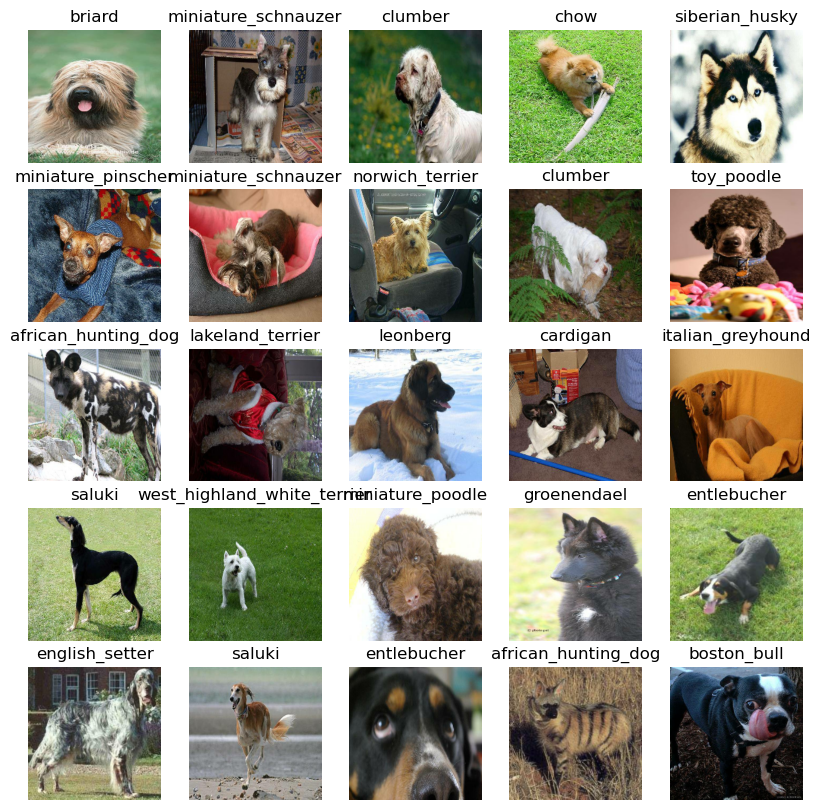

In [36]:
show_25_images(train_images,train_labels)

In [37]:
val_images,val_labels = next(val_data.as_numpy_iterator())
val_images,val_labels

(array([[[[0.29599646, 0.43284872, 0.3056691 ],
          [0.26635826, 0.32996926, 0.22846507],
          [0.31428418, 0.27701408, 0.22934894],
          ...,
          [0.77614343, 0.82320225, 0.8101595 ],
          [0.81291157, 0.8285351 , 0.8406944 ],
          [0.8209297 , 0.8263737 , 0.8423668 ]],
 
         [[0.2344871 , 0.31603682, 0.19543913],
          [0.3414841 , 0.36560842, 0.27241898],
          [0.45016077, 0.40117094, 0.33964607],
          ...,
          [0.7663987 , 0.8134138 , 0.81350833],
          [0.7304248 , 0.75012016, 0.76590735],
          [0.74518913, 0.76002574, 0.7830809 ]],
 
         [[0.30157745, 0.3082587 , 0.21018331],
          [0.2905954 , 0.27066195, 0.18401104],
          [0.4138316 , 0.36170745, 0.2964005 ],
          ...,
          [0.79871625, 0.8418535 , 0.8606443 ],
          [0.7957738 , 0.82859945, 0.8605655 ],
          [0.75181633, 0.77904975, 0.8155256 ]],
 
         ...,
 
         [[0.9746779 , 0.9878955 , 0.9342279 ],
          [0.99153

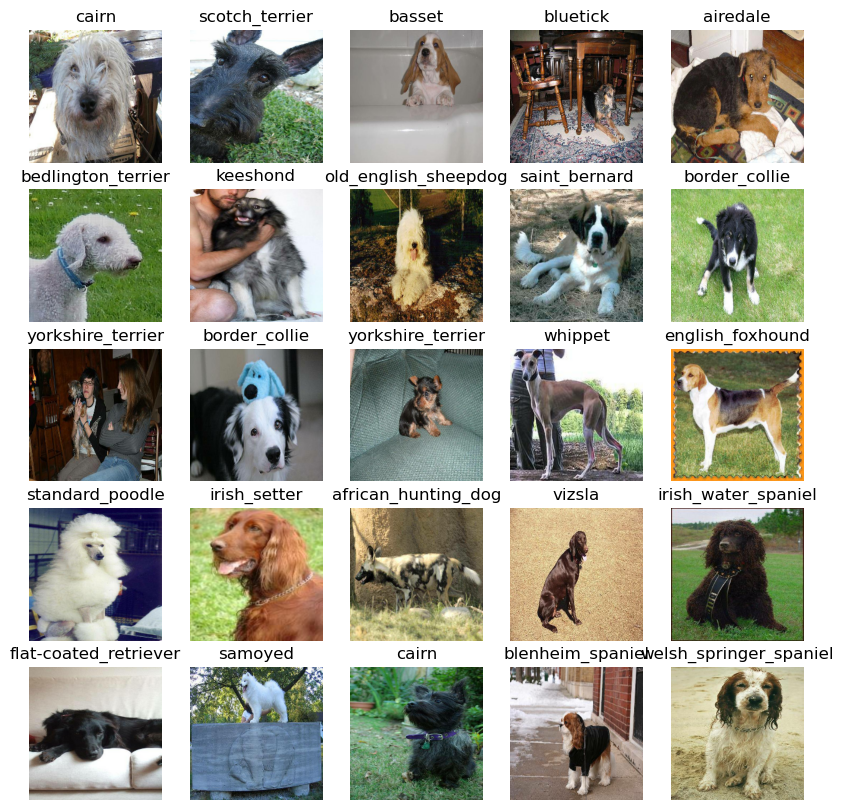

In [38]:
show_25_images(val_images,val_labels)

# Building a Model

* Before Building a model, There are few things we need you to work on
    1. The input shape(our images shape, in the form of tensors) to our model
    2. The output shape(image labels, in the form of tensors) to our model
    3. Model URL of out model

In [39]:
# Setup the input shape
INPUT_SHAPE = [None,IMAGE_SIZE,IMAGE_SIZE,3] # Batch, Height, Width, Color

# Setup the output labels
OUTPUT_SHAPE = len(unique_breeds)

# Setup model url from Tensorflow Hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5"


Now we've got our inputs, outputs and model ready to go. Let's put them together into a Keras deep learning model!

Knowing this, let's create a function which:
* Takes the input shape, output shape and the model we've chosen as parameters.
* Defines the layers in a Keras model in sequential fashion (do this first, then this, then that).
* Compiles the model (says it should be evaluated and improved).
* Builds the model (tells the model the input shape it'll be getting).
* Returns the model.

All of these steps can be found here: https://www.tensorflow.org/guide/keras/overview

In [40]:
# Create a function which builds a Keras model
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building model with:", MODEL_URL)

  # Setup the model layers
  model = tf.keras.Sequential([
      hub.KerasLayer(MODEL_URL),  # Layer 1 (input layer)
      tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                            activation="softmax")  # Layer 2 (output layer)
  ])

  # Compile the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=["accuracy"]
  )

  # Build the model
  model.build(INPUT_SHAPE)

  return model


In [41]:
model = create_model()
model.summary()


Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


## Creating callbacks

Callbacks are helper functions a model can use during training to do such things as save its progress, check its progress or stop training early if a model stops improving.

We'll create two callbacks, one for TensorBoard which helps track our models progress and another for early stopping which prevents our model from training for too long.

### TensorBoard Callback

To setup a TensorBoard callback, we need to do 3 things:
1. Load the TensorBoard notebook extension ✅
2. Create a TensorBoard callback which is able to save logs to a directory and pass it to our model's `fit()` function. ✅
3. Visualize our models training logs with the `%tensorboard` magic function (we'll do this after model training).

https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/TensorBoard

In [42]:
# Load TensorBoard notebook extension
%load_ext tensorboard

In [43]:
import datetime

# Create a function to build a TensorBoard callback


def create_tensorboard_callback():
  # Create a log directory for storing TensorBoard logs
  logdir = os.path.join(".\logs",
                        # Make it so the logs get tracked whenever we run an experiment
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)


### Early Stopping Callback

Early stopping helps stop our model from overfitting by stopping training if a certain evaluation metric stops improving.

https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping

In [44]:
# Create early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3)

## Training a model (on subset of data)

Our first model is only going to train on 1000 images, to make sure everything is working.

In [45]:
NUM_EPOCHS = 10 #@param {type:"slider", min:10, max:100, step:10}

In [46]:
# Check to make sure we're still running on a GPU
print("GPU", "available (YESSS!!!!!!)" if tf.config.list_physical_devices(
    "GPU") else "not available :(")


GPU available (YESSS!!!!!!)


Let's create a function which trains a model.

* Create a model using `create_model()`
* Setup a TensorBoard callback using `create_tensorboard_callback()`
* Call the `fit()` function on our model passing it the training data, validation data, number of epochs to train for (`NUM_EPOCHS`) and the callbacks we'd like to use
* Return the model

In [47]:
# Build a function to train and return a trained model
def train_model():
  """
  Trains a given model and returns the trained version.
  """
  # Create a model
  model = create_model()

  # Create new TensorBoard session everytime we train a model
  tensorboard = create_tensorboard_callback()

  # Fit the model to the data passing it the callbacks we created
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1,
            callbacks=[tensorboard, early_stopping])
  # Return the fitted model
  return model


In [48]:
# Fit the model to the data
model = train_model()


Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Epoch 1/10
25/25 [==============================] - 18s 311ms/step - loss: 4.4459 - accuracy: 0.1112 - val_loss: 3.4167 - val_accuracy: 0.2450
Epoch 2/10
25/25 [==============================] - 3s 109ms/step - loss: 1.5663 - accuracy: 0.6938 - val_loss: 2.1644 - val_accuracy: 0.4850
Epoch 3/10
25/25 [==============================] - 3s 109ms/step - loss: 0.5385 - accuracy: 0.9438 - val_loss: 1.6799 - val_accuracy: 0.5950
Epoch 4/10
25/25 [==============================] - 3s 108ms/step - loss: 0.2465 - accuracy: 0.9862 - val_loss: 1.5057 - val_accuracy: 0.6450
Epoch 5/10
25/25 [==============================] - 3s 112ms/step - loss: 0.1424 - accuracy: 0.9975 - val_loss: 1.4104 - val_accuracy: 0.6550
Epoch 6/10
25/25 [==============================] - 3s 110ms/step - loss: 0.0989 - accuracy: 0.9987 - val_loss: 1.3586 - val_accuracy: 0.6550
Epoch 7/10
25/25 [==============================] - 3s

**Question:** It looks like our model is overfitting because it's performing far better on the training dataset than the validation dataset, what are some ways to prevent model overfitting in deep learning neural networks?

**Note:** Overfitting to begin with is a good thing! It means our model is learning!!!

### Checking the TensorBoard logs

The TensorBoard magic function (`%tensorboard`) will access the logs directory we created earlier and visualize its contents.

In [49]:
%tensorboard --logdir ./logs

Reusing TensorBoard on port 6006 (pid 15984), started 9:38:46 ago. (Use '!kill 15984' to kill it.)

## Making and evaluating predictions using a trained model 


In [50]:
val_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [51]:
predictions = model.predict(val_data,verbose=1)
predictions

7/7 [==============================] - 1s 77ms/step


array([[5.9223250e-03, 4.1086052e-04, 5.5240182e-04, ..., 2.2374441e-04,
        2.2601715e-05, 1.0771529e-03],
       [2.2501247e-03, 6.7053962e-04, 2.2606594e-02, ..., 8.4170670e-04,
        1.8156503e-03, 1.8693482e-04],
       [9.5573341e-05, 2.8013467e-04, 1.5825428e-03, ..., 6.1977014e-05,
        1.5927559e-04, 2.2764918e-05],
       ...,
       [4.0990117e-06, 5.0053216e-04, 3.3771165e-04, ..., 2.2532658e-05,
        5.5013843e-05, 6.9141017e-05],
       [3.8027761e-03, 3.1274653e-04, 2.0746498e-05, ..., 2.5410112e-04,
        8.3515311e-05, 1.5763102e-02],
       [1.6587815e-04, 1.0114522e-05, 2.0533464e-04, ..., 2.0522941e-03,
        3.3685027e-04, 3.9562736e-05]], dtype=float32)

In [52]:
predictions[0]

array([5.9223250e-03, 4.1086052e-04, 5.5240182e-04, 8.7325010e-05,
       3.9234452e-04, 8.7296372e-05, 1.1718619e-02, 1.2427302e-02,
       3.4006650e-04, 1.2668213e-03, 2.2873469e-04, 6.6363646e-05,
       9.2423608e-05, 4.1534222e-05, 2.1643119e-04, 3.1931108e-04,
       2.6209345e-05, 1.1351951e-01, 4.6282788e-05, 2.3963352e-04,
       1.0788447e-03, 2.1809559e-04, 7.6096381e-05, 2.2080159e-03,
       1.0676778e-04, 5.0746190e-04, 3.7936547e-01, 6.6817716e-05,
       4.4664758e-04, 3.2623723e-04, 4.6650620e-04, 1.0551846e-03,
       4.5703682e-03, 2.9869055e-04, 7.7963465e-05, 1.5658038e-02,
       1.7091734e-04, 1.2060330e-03, 1.2752000e-04, 3.1248052e-04,
       1.3423889e-03, 4.4209450e-05, 7.3998417e-05, 6.2432722e-05,
       1.8842633e-05, 1.8697495e-04, 3.4155641e-05, 7.9325146e-05,
       5.0365855e-04, 2.4972850e-04, 6.7945453e-05, 1.7225080e-04,
       1.3347711e-04, 1.2741066e-04, 2.1878826e-04, 1.0494022e-04,
       1.5934255e-04, 4.3679462e-03, 8.6348889e-05, 2.7170181e

In [86]:
# First prediction
index = 12
print(predictions[index])
print(f"Max value (probability of prediction): {np.max(predictions[index])}")
print(f"Sum: {np.sum(predictions[index])}")
print(f"Max index: {np.argmax(predictions[index])}")
print(f"Predicted label: {unique_breeds[np.argmax(predictions[index])]}")


[6.56118849e-03 6.94762392e-04 4.09731991e-04 4.29466134e-03
 2.90911958e-05 1.00992756e-05 3.98546785e-01 1.38497184e-04
 8.43445087e-05 5.44687464e-05 2.75938401e-05 2.17548310e-04
 6.99987810e-04 1.03134196e-03 4.49487452e-05 9.75853618e-05
 2.29172128e-05 1.51090921e-04 2.58279488e-05 5.78734092e-04
 4.49613523e-04 2.37875691e-04 6.73327770e-04 2.42516820e-04
 3.31665389e-04 4.86668068e-05 5.45780268e-03 3.21506341e-05
 3.68385699e-05 1.23095512e-02 3.86793436e-05 5.33007369e-05
 7.99709378e-05 4.10451821e-06 6.69966494e-06 4.65360412e-04
 1.27697916e-04 4.13513859e-04 1.52292865e-04 4.94183987e-05
 5.55513652e-05 1.77275542e-05 3.81435916e-06 3.48491631e-05
 1.95294360e-05 1.69209845e-04 1.11866812e-03 1.79599174e-05
 5.89022820e-05 7.18606389e-05 1.20019373e-02 2.81271314e-05
 8.62904744e-06 1.27480831e-04 1.26852092e-05 1.25681745e-05
 1.11973553e-03 1.73337925e-02 2.71587578e-05 1.15151553e-04
 8.82790628e-05 6.12224103e-05 5.60756889e-04 8.15865642e-05
 2.30817066e-04 1.026762

In [87]:
unique_breeds[6]


'australian_terrier'

Having the the above functionality is great but we want to be able to do it at scale.

And it would be even better if we could see the image the prediction is being made on!

**Note:** Prediction probabilities are also known as confidence levels.

In [55]:
# Turn prediction probabilities into their respective label (easier to understand)
def get_pred_label(prediction_probabilities):
  """
  Turns an array of prediction probabilities into a label.
  """
  return unique_breeds[np.argmax(prediction_probabilities)]

# Get a predicted label based on an array of prediction probabilities
# pred_label = get_pred_label(predictions[81])
# pred_label

In [56]:
val_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [57]:
# Create a function to unbatch a batch dataset
def unbatchify(data):
  """
  Takes a batched dataset of (image, label) Tensors and reutrns separate arrays
  of images and labels.
  """
  images = []
  labels = []
  # Loop through unbatched data
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])
  return images, labels


# Unbatchify the validation data
val_images, val_labels = unbatchify(val_data)
val_images[0], val_labels[0]


(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.27701408, 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

Now we've got ways to get get:
* Prediction labels
* Validation labels (truth labels)
* Validation images

Let's make some function to make these all a bit more visaulize.

We'll create a function which:
* Takes an array of prediction probabilities, an array of truth labels and an array of images and an integer. ✅
* Convert the prediction probabilities to a predicted label. ✅
* Plot the predicted label, its predicted probability, the truth label and the target image on a single plot. ✅

In [58]:
def plot_pred(prediction_probabilities, labels, images, n=1):
  """
  View the prediction, ground truth and image for sample n
  """
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]

  # Get the pred label
  pred_label = get_pred_label(pred_prob)

  # Plot image & remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # Change the colour of the title depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Change plot title to be predicted, probability of prediction and truth label
  plt.title("{} {:2.0f}% {}".format(pred_label,
                                    np.max(pred_prob)*100,
                                    true_label),
            color=color)


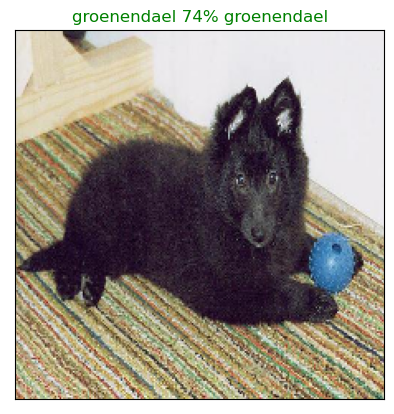

In [59]:
plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images,
          n=77)


Now we've got one function to visualize our models top prediction, let's make another to view our models top 10 predictions.

This function will:
* Take an input of prediction probabilities array and a ground truth array and an integer ✅
* Find the prediction using `get_pred_label()` ✅
* Find the top 10:
  * Prediction probabilities indexes ✅
  * Prediction probabilities values ✅
  * Prediction labels ✅
* Plot the top 10 prediction probability values and labels, coloring the true label green ✅

In [60]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  """
  Plus the top 10 highest prediction confidences along with the truth label for sample n.
  """
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # Get the predicted label
  pred_label = get_pred_label(pred_prob)

  # Find the top 10 prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  # Find the top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  # Find the top 10 prediction labels
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]

  # Setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")

  # Change color of true label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass


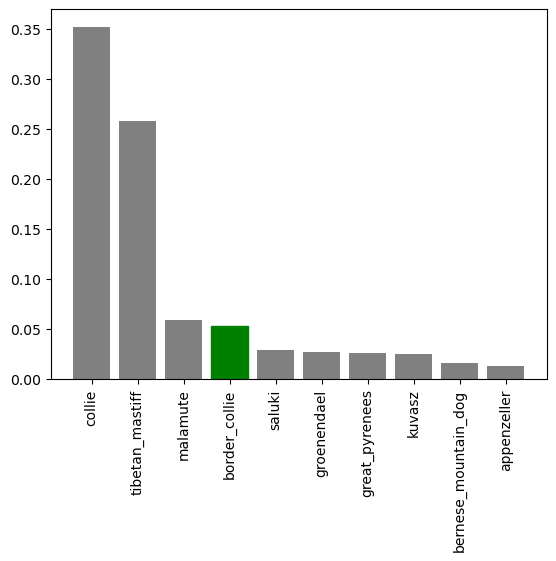

In [61]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels,
               n=9)


Now we've got some function to help us visualize our predictions and evaluate our modle, let's check out a few.

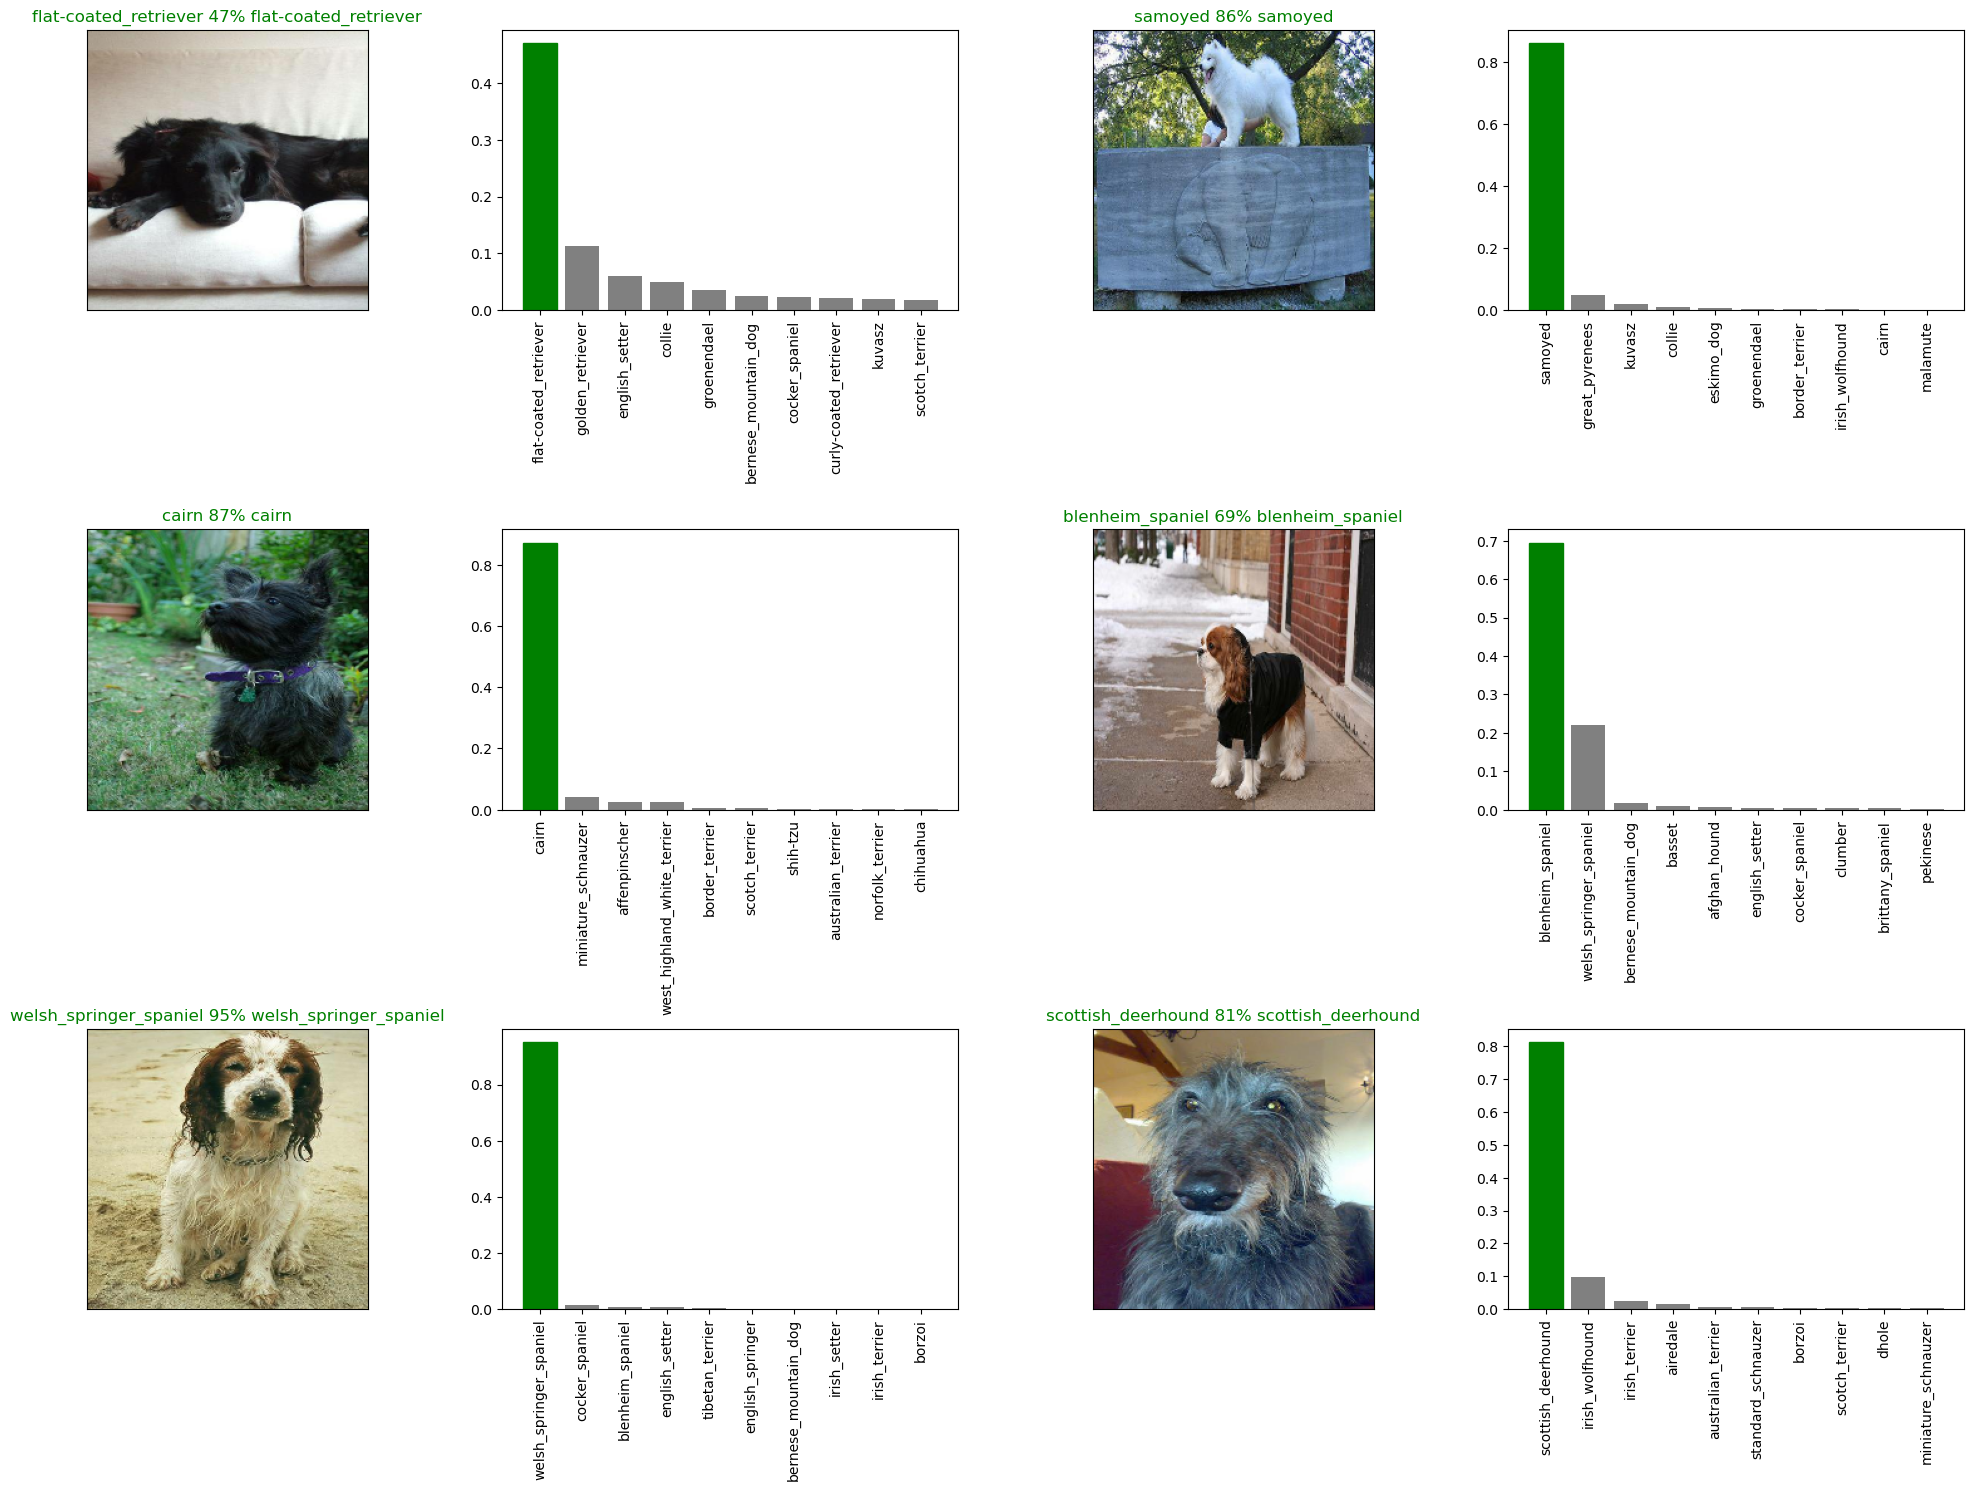

In [62]:
# Let's check out a few predictions and their different values
i_multiplier = 20
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(10*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                 labels=val_labels,
                 n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()


**Challenge:** How would you create a confusion matrix with our models predictions and true labels?

## Saving and reloading a trained model

In [63]:
# Create a function to save a model
import os as os
def save_model(model, suffix=None):
  """
  Saves a given model in a models directory and appends a suffix (string).
  """
  # Create a model directory pathname with current time
  modeldir = os.path.join("/Machine_Learning/Deep_Learning/DBI/models/")
  model_path = modeldir + "-" + suffix + ".h5"  # save format of model
  print(f"Saving model to: {model_path}...")
  model.save(model_path)
  return model_path


In [64]:
# Create a function to load a trained model
def load_model(model_path):
  """
  Loads a saved model from a specified path.
  """
  print(f"Loading saved model from: {model_path}")
  model = tf.keras.models.load_model(model_path,
                                     custom_objects={"KerasLayer": hub.KerasLayer})
  return model


Now we've got functions to save and load a trained model, let's make sure they work!


In [65]:
# Save our model trained on 1000 images
save_model(model, suffix="1000-images-mobilenetv2-Adam")

Saving model to: /Machine_Learning/Deep_Learning/DBI/models/-1000-images-mobilenetv2-Adam.h5...


'/Machine_Learning/Deep_Learning/DBI/models/-1000-images-mobilenetv2-Adam.h5'

In [66]:
# Load a trained model
loaded_1000_image_model = load_model('/Machine_Learning/Deep_Learning/DBI/models/-1000-images-mobilenetv2-Adam.h5')

Loading saved model from: /Machine_Learning/Deep_Learning/DBI/models/-1000-images-mobilenetv2-Adam.h5


In [67]:
# Evaluate the pre-saved model
model.evaluate(val_data)


7/7 [==============================] - 1s 77ms/step - loss: 1.2760 - accuracy: 0.6750


[1.275980830192566, 0.675000011920929]

In [68]:
# Evaluate the loaded model
loaded_1000_image_model.evaluate(val_data)


7/7 [==============================] - 2s 76ms/step - loss: 1.2760 - accuracy: 0.6750


[1.275980830192566, 0.675000011920929]

## Training a big dog model 🐶 (on the full data)

In [69]:
len(X),len(y)

(10222, 10222)

In [70]:
# Create a data batch with the full data set
full_data = create_data_batches(X, y)


Creating training data batches...


In [71]:
full_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [72]:
# Create a model for full model
full_model = create_model()


Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5


In [73]:
# Create full model callbacks
full_model_tensorboard = create_tensorboard_callback()
# No validation set when training on all the data, so we can't monitor validation accuracy
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                             patience=3)


**Note:** Running the cell below will take a little while (maybe up to 30 minutes for the first epoch) because the GPU we're using in the runtime has to load all of the images into memory.

In [74]:
# Fit the full model to the full data
full_model.fit(x=full_data,
               epochs=NUM_EPOCHS,
               callbacks=[full_model_tensorboard, full_model_early_stopping])


Epoch 1/10
320/320 [==============================] - 144s 437ms/step - loss: 1.3276 - accuracy: 0.6699
Epoch 2/10
320/320 [==============================] - 27s 85ms/step - loss: 0.3981 - accuracy: 0.8818
Epoch 3/10
320/320 [==============================] - 27s 85ms/step - loss: 0.2377 - accuracy: 0.9347
Epoch 4/10
320/320 [==============================] - 28s 87ms/step - loss: 0.1545 - accuracy: 0.9645
Epoch 5/10
320/320 [==============================] - 27s 85ms/step - loss: 0.1057 - accuracy: 0.9777
Epoch 6/10
320/320 [==============================] - 27s 85ms/step - loss: 0.0771 - accuracy: 0.9858
Epoch 7/10
320/320 [==============================] - 27s 85ms/step - loss: 0.0577 - accuracy: 0.9918
Epoch 8/10
320/320 [==============================] - 27s 86ms/step - loss: 0.0462 - accuracy: 0.9937
Epoch 9/10
320/320 [==============================] - 27s 85ms/step - loss: 0.0382 - accuracy: 0.9953
Epoch 10/10
320/320 [==============================] - 27s 85ms/step - loss: 0.0

In [75]:
save_model(full_model, suffix="full-image-set-mobilenetv2-Adam")


Saving model to: /Machine_Learning/Deep_Learning/DBI/models/-full-image-set-mobilenetv2-Adam.h5...


'/Machine_Learning/Deep_Learning/DBI/models/-full-image-set-mobilenetv2-Adam.h5'

In [76]:
# Load in the full model
loaded_full_model = load_model(
    'E:\Machine_Learning\Deep_Learning\DBI\models\-full-image-set-mobilenetv2-Adam.h5')


Loading saved model from: E:\Machine_Learning\Deep_Learning\DBI\models\-full-image-set-mobilenetv2-Adam.h5


In [77]:
loaded_full_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_2 (KerasLayer)  (None, 1001)              5432713   
                                                                 
 dense_2 (Dense)             (None, 120)               120240    
                                                                 
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


## Making predictions on the test dataset

Since our model has been trained on images in the form of Tensor batches, to make predictions on the test data, we'll have to get it into the same format.

Luckily we created `create_data_batches()` earlier which can take a list of filenames as input and conver them into Tensor batches.

To make predictions on the test data, we'll:
* Get the test image filenames. ✅
* Convert the filenames into test data batches using `create_data_batches()` and setting the `test_data` parameter to `True` (since the test data doesn't have labels). ✅
* Make a predictions array by passing the test batches to the `predict()` method called on our model. 

In [78]:
# Load test image filenames
test_path = "/Machine_Learning/Deep_Learning/DBI/test/"
test_filenames = [test_path + fname for fname in os.listdir(test_path)]
test_name = [os.path.splitext(fname)[0] for fname in os.listdir(test_path)]
len(test_name)


10357

In [79]:
# Create test data batch
test_data = create_data_batches(test_filenames, test_data=True)


Creating test data batches...


In [80]:
test_data

<BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

**Note:** Calling `predict()` on our full model and passing it the test data batch will take a long time to run (about a ~1hr). This is because we have to process ~10,000+ images and get our model to find patterns in those images and generate predictions based on what its learned in the training dataset.

In [81]:
# Make predictions on test data batch using the loaded full model
test_predictions = loaded_full_model.predict(test_data,
                                             verbose=1)


324/324 [==============================] - 28s 84ms/step


In [82]:
df = pd.DataFrame(columns = ["id"]+list(unique_breeds))
df.id = test_name
df

id affenpinscher afghan_hound  \
0      000621fb3cbb32d8935728e48679680e           NaN          NaN   
1      00102ee9d8eb90812350685311fe5890           NaN          NaN   
2      0012a730dfa437f5f3613fb75efcd4ce           NaN          NaN   
3      001510bc8570bbeee98c8d80c8a95ec1           NaN          NaN   
4      001a5f3114548acdefa3d4da05474c2e           NaN          NaN   
...                                 ...           ...          ...   
10352  ffeda8623d4eee33c6d1156a2ecbfcf8           NaN          NaN   
10353  fff1ec9e6e413275984966f745a313b0           NaN          NaN   
10354  fff74b59b758bbbf13a5793182a9bbe4           NaN          NaN   
10355  fff7d50d848e8014ac1e9172dc6762a3           NaN          NaN   
10356  fffbff22c1f51e3dc80c4bf04089545b           NaN          NaN   

      african_hunting_dog airedale american_staffordshire_terrier appenzeller  \
0                     NaN      NaN                            NaN         NaN   
1                     NaN      NaN                            NaN         NaN   
2                     NaN      NaN                            NaN         NaN   
3                     NaN      NaN                            NaN         NaN   
4                     NaN      NaN                            NaN         NaN   
...                   ...      ...                            ...         ...   
10352                 NaN      NaN                            NaN         NaN   
10353                 NaN      NaN                            NaN         NaN   
10354                 NaN      NaN                            NaN         NaN   
10355                 NaN      NaN                            NaN         NaN   
10356                 NaN      NaN                            NaN         NaN   

      australian_terrier basenji basset  ... toy_poodle toy_terrier vizsla  \
0                    NaN     NaN    NaN  ...        NaN         NaN    NaN   
1                    NaN     NaN    NaN  ...        NaN         NaN    NaN   
2                    NaN     NaN    NaN  ...        NaN         NaN    NaN   
3                    NaN     NaN    NaN  ...        NaN         NaN    NaN   
4                    NaN     NaN    NaN  ...        NaN         NaN    NaN   
...                  ...     ...    ...  ...        ...         ...    ...   
10352                NaN     NaN    NaN  ...        NaN         NaN    NaN   
10353                NaN     NaN    NaN  ...        NaN         NaN    NaN   
10354                NaN     NaN    NaN  ...        NaN         NaN    NaN   
10355                NaN     NaN    NaN  ...        NaN         NaN    NaN   
10356                NaN     NaN    NaN  ...        NaN         NaN    NaN   

      walker_hound weimaraner welsh_springer_spaniel  \
0              NaN        NaN                    NaN   
1              NaN        NaN                    NaN   
2              NaN        NaN                    NaN   
3              NaN        NaN                    NaN   
4              NaN        NaN                    NaN   
...            ...        ...                    ...   
10352          NaN        NaN                    NaN   
10353          NaN        NaN                    NaN   
10354          NaN        NaN                    NaN   
10355          NaN        NaN                    NaN   
10356          NaN        NaN                    NaN   

      west_highland_white_terrier whippet wire-haired_fox_terrier  \
0                             NaN     NaN                     NaN   
1                             NaN     NaN                     NaN   
2                             NaN     NaN                     NaN   
3                             NaN     NaN                     NaN   
4                             NaN     NaN                     NaN   
...                           ...     ...                     ...   
10352                         NaN     NaN                     NaN   
10353                         NaN     NaN                    

In [83]:
df[list(unique_breeds)] = test_predictions

In [84]:
df.head()

id  affenpinscher  afghan_hound  \
0  000621fb3cbb32d8935728e48679680e   4.678351e-10  2.654998e-10   
1  00102ee9d8eb90812350685311fe5890   1.779248e-05  7.062190e-06   
2  0012a730dfa437f5f3613fb75efcd4ce   8.498104e-10  1.413685e-05   
3  001510bc8570bbeee98c8d80c8a95ec1   2.321496e-04  3.052541e-06   
4  001a5f3114548acdefa3d4da05474c2e   1.386404e-04  4.716561e-05   

   african_hunting_dog      airedale  american_staffordshire_terrier  \
0         7.502202e-12  4.453640e-12                    3.641181e-11   
1         3.481903e-06  1.985129e-07                    3.041078e-05   
2         7.794514e-08  1.183286e-09                    1.130658e-09   
3         6.744249e-05  9.762498e-06                    1.203812e-03   
4         1.552532e-07  8.609756e-09                    3.979016e-08   

    appenzeller  australian_terrier       basenji        basset  ...  \
0  1.731068e-10        1.640647e-13  1.496577e-11  3.975138e-11  ...   
1  2.686601e-06        3.622694e-05  1.665420e-05  4.996233e-07  ...   
2  2.003462e-08        1.713164e-09  1.643776e-10  3.716084e-07  ...   
3  1.599184e-05        4.787885e-10  3.476657e-07  3.650004e-06  ...   
4  4.834564e-10        1.792949e-08  6.196767e-08  2.237750e-08  ...   

     toy_poodle   toy_terrier        vizsla  walker_hound    weimaraner  \
0  9.632454e-11  1.949549e-11  2.217410e-12  1.654942e-12  1.111080e-11   
1  9.929860e-07  2.530241e-06  6.192863e-07  2.908586e-05  1.775239e-06   
2  9.559610e-11  6.378932e-10  1.873612e-07  1.120409e-06  2.361262e-07   
3  5.069804e-05  4.489937e-08  4.190312e-05  9.693188e-08  8.439650e-07   
4  1.060396e-06  7.664013e-10  4.067626e-10  4.808877e-10  1.056313e-08   

   welsh_springer_spaniel  west_highland_white_terrier       whippet  \
0            2.525981e-11                 1.217182e-11  4.097036e-12   
1            5.962958e-06                 1.510697e-03  1.297861e-08   
2            1.755281e-06                 2.317132e-10  8.917967e-07   
3            1.770480e-08                 8.967481e-13  1.582669e-02   
4            4.403494e-09                 4.936120e-09  3.305270e-08   

   wire-haired_fox_terrier  yorkshire_terrier  
0             8.657967e-09       7.672812e-10  
1             7.784408e-07       1.433058e-07  
2             5.000699e-09       9.707305e-10  
3             2.489510e-09       9.692060e-06  
4             1.050781e-08       6.524191e-07  

[5 rows x 121 columns]

In [85]:
# Submission for kaggle
df.to_csv("./test_preds.csv",index=False)